In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [2]:
class Kmean_simple():
    """一个简单的K_mean模型"""
    def __init__(self, k=2, max_iterations=500):
        self.k = k
        self.max_iterations = max_iterations

    def _init_centers(self, X):
        """创建第一批中心点"""
        n_sample, n_featrue = X.shape[0], X.shape[1]
        centers = np.zeros((self.k, n_featrue))
        for i in range(self.k):
            center = X[np.random.randint(n_sample)]
            centers[i] = center
        return centers

    def _create_complexs(self, X, centres):
        """创建各个类的集合体"""
        complexs = [[] for _ in range(self.k)]
        for i_index, i_sample in enumerate(X):
            init_distance = float('inf')
            for j_index, j_center in enumerate(centres):
                distance = np.linalg.norm(i_sample - j_center)
                if distance < init_distance:
                    init_distance = distance
                    sample_type = j_index
            complexs[sample_type].append(i_index)
        return complexs

    def _recenters(self, X, complexs):
        """重新修改中心点"""
        n_featrue = X.shape[1]
        centers = np.zeros((self.k, n_featrue))
        for type_index, type_value in enumerate(complexs):
            new_center = np.mean(X[type_value], axis=0)
            centers[type_index] = new_center
        return centers

    def _get_results(self, X, complexs):
        """得出最后的结果"""
        result_predict = np.zeros((X.shape[0], ))
        for type_index, type_value in enumerate(complexs):
            for sample_index in type_value:
                result_predict[sample_index] = type_index
        return result_predict

    def predict(self, X):
        centres = self._init_centers(X)
        time = 0
        while time < self.max_iterations:
            time += 1
            complexs = self._create_complexs(X, centres)
            pre_centers = centres
            centres = self._recenters(X, complexs)
            if np.linalg.norm(centres-pre_centers) == 0:
                return self._get_results(X, complexs)

In [7]:
iris = load_iris()
X = iris['data'][:, (2, 3)] # 只取后两个特征，一个是为了方便画图
y = iris['target']# 二确实是使用最后俩个特征效果更好
KMean = Kmean_simple(k=3)
result = KMean.predict(X)
result, y # 看一下聚类结果和原来情况

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
        2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def draw_pot(X, y):
    x_1 = X[:, 0][y == 0]
    x_2 = X[:, 1][y == 0]
    plt.plot(x_1, x_2, 'b+')
    x_1 = X[:, 0][y == 1]
    x_2 = X[:, 1][y == 1]
    plt.plot(x_1, x_2, 'g^')
    x_1 = X[:, 0][y == 2]
    x_2 = X[:, 1][y == 2]
    plt.plot(x_1, x_2, 'r*')
    plt.show # 绘制原来的效果

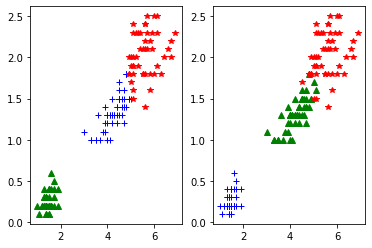

In [12]:
plt.subplot(121)
draw_pot(X, result)
plt.subplot(122)
draw_pot(X, y)